# Introduction to Data

**GOALS**:

- Load data into notebook using `Pandas`
- Describe features and variable types
- Select Columns from `DataFrame`
- Filter data based on comparisons
- Group and sort data for high and low values
- Visualize Distributions of data


**EXAMPLE I**: Mass Shootings in the United States of America

This dataset comes to us from a kaggle.com example.  It contains information about mass shootings in the United States from the 1960's forward to recent examples.  For specific information about the dataset, see:  https://www.kaggle.com/zusmani/us-mass-shootings-last-50-years/home


![](images/shootings.png)



In [1]:
%matplotlib inline
import pandas as pd

In [2]:
shootings = pd.read_csv('data/mass_shootings.csv', encoding = "ISO-8859-1", parse_dates=["Date"])

In [3]:
shootings.head()

,S#,Title,Location,Date,Incident Area,Open/Close Location,Target,Cause,Summary,Fatalities,...,Total victims,Policeman Killed,Age,Employeed (Y/N),Employed at,Mental Health Issues,Race,Gender,Latitude,Longitude
0,1,Texas church mass shooting,"Sutherland Springs, TX",2017-11-05,Church,Close,random,unknown,"Devin Patrick Kelley, 26, an ex-air force offi...",26,...,46,0.0,26,NaN,NaN,No,White,M,NaN,NaN
1,2,Walmart shooting in suburban Denver,"Thornton, CO",2017-11-01,Wal-Mart,Open,random,unknown,"Scott Allen Ostrem, 47, walked into a Walmart ...",3,...,3,0.0,47,NaN,NaN,No,White,M,NaN,NaN
2,3,Edgewood businees park shooting,"Edgewood, MD",2017-10-18,Remodeling Store,Close,coworkers,unknown,"Radee Labeeb Prince, 37, fatally shot three pe...",3,...,6,0.0,37,NaN,Advance Granite Store,No,Black,M,NaN,NaN
3,4,Las Vegas Strip mass shooting,"Las Vegas, NV",2017-10-01,Las Vegas Strip Concert outside Mandala Bay,Open,random,unknown,"Stephen Craig Paddock, opened fire from the 32...",59,...,585,1.0,64,NaN,NaN,Unclear,White,M,36.181271,-115.134132
4,5,San Francisco UPS shooting,"San Francisco, CA",2017-06-14,UPS facility,Close,coworkers,NaN,"Jimmy Lam, 38, fatally shot three coworkers an...",3,...,5,0.0,38,1.0,NaN,Yes,Asian,M,NaN,NaN


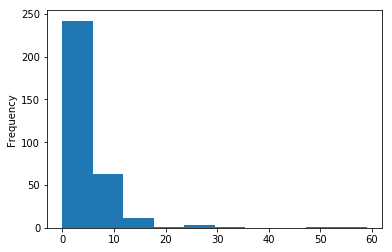

In [4]:
shootings['Fatalities'].plot(kind = 'hist')

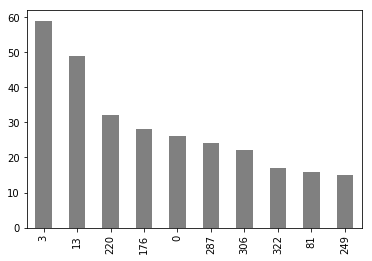

In [5]:
shootings['Fatalities'].nlargest(10).plot(kind = 'bar', color = 'grey')

In [6]:
shootings.iloc[3]

S#                                                                      4
Title                                       Las Vegas Strip mass shooting
Location                                                    Las Vegas, NV
Date                                                  2017-10-01 00:00:00
Incident Area                 Las Vegas Strip Concert outside Mandala Bay
Open/Close Location                                                  Open
Target                                                             random
Cause                                                             unknown
Summary                 Stephen Craig Paddock, opened fire from the 32...
Fatalities                                                             59
Injured                                                               527
Total victims                                                         585
Policeman Killed                                                        1
Age                                   

In [7]:
shootings.loc[3, 'Summary']

'Stephen Craig Paddock, opened fire from the 32nd floor of Manadalay Bay hotel at Last Vegas concert goers for no obvious reason. He shot himself and died on arrival of law enforcement agents. He was 64'

## PROBLEM

1. What were the other largest shooting incidents in recent history?

2. What was the average age of the shooters?

3. Identify 4 other questions you have about the data.

## Example 2: Gun Violence in United States

![](images/gun_violence.png)

In [8]:
gun_violence = pd.read_csv('data/gun-violence-data.zip', compression='zip')

In [9]:
gun_violence.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239677 entries, 0 to 239676
Data columns (total 29 columns):
incident_id                    239677 non-null int64
date                           239677 non-null object
state                          239677 non-null object
city_or_county                 239677 non-null object
address                        223180 non-null object
n_killed                       239677 non-null int64
n_injured                      239677 non-null int64
incident_url                   239677 non-null object
source_url                     239209 non-null object
incident_url_fields_missing    239677 non-null bool
congressional_district         227733 non-null float64
gun_stolen                     140179 non-null object
gun_type                       140226 non-null object
incident_characteristics       239351 non-null object
latitude                       231754 non-null float64
location_description           42089 non-null object
longitude                    

In [10]:
import folium

In [11]:
m = folium.Map(location = (gun_violence.latitude[0], gun_violence.longitude[0]))

In [12]:
m

In [13]:
m = folium.Map(location = (gun_violence.latitude[0], gun_violence.longitude[0]),
              tiles = 'Stamen Toner',
              zoom_start = 10)

In [14]:
m

In [15]:
folium.features.Circle(radius = gun_violence.n_killed[0]/0.000001, location = [gun_violence.latitude[0], gun_violence.longitude[0]]).add_to(m)

In [16]:
m

In [17]:
for index, row in gun_violence.dropna().iterrows():
    folium.CircleMarker(location=(row["latitude"],
                                  row["longitude"]),
                        radius=row["n_killed"]*5,
               fill=True).add_to(m)

In [18]:
m

## Using an API

Below, we will use the NYCOpenData interface to extract information about the New York City Police Department.  The data can be found here: https://www1.nyc.gov/site/nypd/stats/crime-statistics/citywide-crime-stats.page .

![](images/nycpopo.png)

In [38]:
#!/usr/bin/env python

# make sure to install these packages before running:
# pip install pandas
#!pip install sodapy

import pandas as pd
from sodapy import Socrata

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("data.cityofnewyork.us", app_token = '')

# Example authenticated client (needed for non-public datasets):
#client = Socrata(data.cityofnewyork.us,
#                 'wm9hG5vT74r9gq6jTAJDMtkG4',
 #                 userame="jfkoehler@newschool.edu",
  #                password="Meatball1!")

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("9s4h-37hy", limit=100000)

# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)

In [39]:
results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
addr_pct_cd          99999 non-null object
boro_nm              99997 non-null object
cmplnt_fr_dt         99993 non-null object
cmplnt_fr_tm         100000 non-null object
cmplnt_num           100000 non-null object
cmplnt_to_dt         73252 non-null object
cmplnt_to_tm         73272 non-null object
crm_atpt_cptd_cd     100000 non-null object
hadevelopt           2532 non-null object
juris_desc           100000 non-null object
ky_cd                100000 non-null object
lat_lon              11 non-null object
latitude             11 non-null object
law_cat_cd           100000 non-null object
loc_of_occur_desc    56034 non-null object
longitude            11 non-null object
ofns_desc            99662 non-null object
parks_nm             541 non-null object
pd_cd                100000 non-null object
pd_desc              100000 non-null object
prem_typ_desc        99506 non-nul

In [40]:
results_df.pd_desc.head()

0                        RAPE 2
1    CHILD, ENDANGERING WELFARE
2    CHILD, ENDANGERING WELFARE
3                  SEXUAL ABUSE
4              SEXUAL ABUSE 3,2
Name: pd_desc, dtype: object

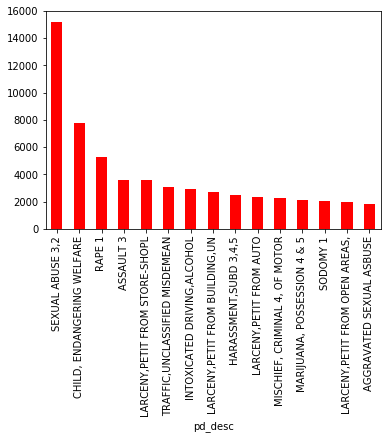

In [45]:
results_df.groupby('pd_desc')['pd_desc'].count().nlargest(15).plot(kind = 'bar', color = 'red')

In [47]:
results_df.to_csv('data/nyc_police_incidents.csv')